# DAV 6150 Module  Assignment: Understanding Classification Model Performance Metrics

## Group Members:
   1. Lucia Shumba
   2. Alwyn Munatsi
   3. Bekithemba Nkomo
   4. Chidochashe Makanga


## Assignment Overview
**Course**: Data Science  
---

## 1. Introduction

### Problem Statement

In modern healthcare analytics, accurate evaluation of binary classification models is crucial for reliable predictions in medical diagnostics. This assignment addresses a key challenge in data science: developing and validating custom implementations of classification performance metrics while comparing them to established library functions. Using a dataset of approximately 180 labeled binary observations for diabetes prediction, we implement and analyze various metrics to assess model performance comprehensively.

The primary goal is to create custom Python functions for key classification metrics (accuracy, precision, sensitivity, specificity, F1 score, ROC curve, and AUC) without relying on pre-built calculation functions, then validate their results against scikit-learn's implementations.

### Dataset Overview and Domain Knowledge

The dataset used is a subset of the Pima Indian Diabetes dataset, containing binary classifications for diabetes presence. The data includes:

- **Sample Size**: Approximately 180 observations
- **Feature Space**: Additional attributes like pregnant, glucose, etc. (not used for metrics calculation)
- **Key Columns for Analysis**:
  1. class: Actual classification (0 or 1)
  2. scored.class: Predicted classification (0 or 1, based on 0.5 threshold)
  3. scored.probability: Model's probability score for class 1
     - We treat class = 1 as the positive class and class = 0 as the negative class throughout the notebook.


**Domain Knowledge**:
1. **Medical Context**: Binary classification in healthcare requires high sensitivity to minimize false negatives.
2. **Performance Metrics**: Accuracy alone is insufficient for imbalanced classes; balanced metrics like F1 and AUC are essential.
3. **Threshold Considerations**: The 0.5 threshold for predictions may not be optimal for medical applications.
4. **Evaluation Graphics**: ROC curves provide visual insights into trade-offs between sensitivity and specificity.


**Task 1: Load the provided M5_Data.csv file to your DAV 6150 Github Repository.**

The dataset has been successfully loaded to Github Repository(DAV-6150)

**Task 2: Read the dataset from Github Repository**

In [16]:
# Import necessary libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For creating visualizations
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [17]:
# Load the dataset from GitHub repository
url = "https://raw.githubusercontent.com/bnkomo-creator/DAV-6150/refs/heads/main/M5_Data.csv"

# Read the CSV file from the provided URL into a pandas DataFrame
df = pd.read_csv(url)

# Print the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape: {df.shape}")

# Print the number of rows in a formatted way
print(f"Number of rows: {df.shape[0]:,}")

# Print the number of columns
print(f"Number of columns: {df.shape[1]}")

# Display the first 5 rows of the DataFrame to get a glimpse of the data
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display information about the DataFrame, including data types and non-null values
print("\nDataset info:")
display(df.info())

Dataset shape: (181, 11)
Number of rows: 181
Number of columns: 11

First 5 rows of the dataset:


,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pregnant            181 non-null    int64  
 1   glucose             181 non-null    int64  
 2   diastolic           181 non-null    int64  
 3   skinfold            181 non-null    int64  
 4   insulin             181 non-null    int64  
 5   bmi                 181 non-null    float64
 6   pedigree            181 non-null    float64
 7   age                 181 non-null    int64  
 8   class               181 non-null    int64  
 9   scored.class        181 non-null    int64  
 10  scored.probability  181 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 15.7 KB


None

**Task 3: Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data. Make sure you closely examine the output e.g., do the rows represent the actual or the predicted classification? What about the columns? (HINT: A good way to ensure you understand the output of the crosstab() function is to check the value_counts() for the dataframe columns you’ve used as input to the crosstab() function. When observing the value_counts(), determine whether the rows or columns in the crosstab() output sum to the respective value_counts() figures)**

In [18]:
# Calculate and display the confusion matrix using pd.crosstab()
confusion_matrix = pd.crosstab(
    df['scored.class'],  # Rows represent the predicted class
    df['class'],         # Columns represent the actual class
    rownames=['Actual'], # Label for the row index
    colnames=['Predicted'] # Label for the column index
)
print("Confusion Matrix:")
display(confusion_matrix)

# Display value counts for 'class' (actual classifications)
print("\nValue counts for 'class':")
display(df['class'].value_counts())

# Display value counts for 'scored.class' (predicted classifications)
print("\nValue counts for 'scored.class':")
display(df['scored.class'].value_counts())

Confusion Matrix:


Predicted,0,1
Actual,,
0,119,30
1,5,27



Value counts for 'class':


,count
class,
0,124
1,57



Value counts for 'scored.class':


,count
scored.class,
0,149
1,32


**Task 4: Extract the individual confusion matrix values (i.e., True Positive, False Positive, True Negative, False Negative) from the output of the crosstab() function and save them for later use (e.g., save them each to individual variables or to the data structure of your choice). Knowing how to properly extract these values from the output of crosstab() will serve you well throughout the remainder of the assignment**

In [19]:
# Extracting the individual confusion matrix values into separate variables
tn = confusion_matrix.iloc[0, 0]  # True Negative (Actual: 0, Predicted: 0)
fp = confusion_matrix.iloc[0, 1]  # False Positive (Actual: 0, Predicted: 1)
fn = confusion_matrix.iloc[1, 0]  # False Negative (Actual: 1, Predicted: 0)
tp = confusion_matrix.iloc[1, 1]  # True Positive (Actual: 1, Predicted: 1)
total = confusion_matrix.values.sum() # Calculate total number of instances

print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")
print(f"Total instances: {total}") # Print the total number of instances

True Negative (TN): 119
False Positive (FP): 30
False Negative (FN): 5
True Positive (TP): 27
Total instances: 181


**Task 5: Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the accuracy metric for the predictions without utilizing any pre-built Python accuracy metric calculation functions.**

In [20]:
def calculate_accuracy(actual, predicted):

    # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
    # Assuming 1 is the positive class and 0 is the negative class
    tp = ((actual == 1) & (predicted == 1)).sum()
    tn = ((actual == 0) & (predicted == 0)).sum()
    fp = ((actual == 0) & (predicted == 1)).sum()
    fn = ((actual == 1) & (predicted == 0)).sum()

    # Calculate Accuracy
    # Accuracy is the ratio of correctly predicted instances to the total instances.
    # Formula: (True Positives + True Negatives) / Total Instances
    total = tp + tn + fp + fn
    accuracy = (tp + tn) / total if total > 0 else 0
    return accuracy

# Calculate and print the accuracy
accuracy_score = calculate_accuracy(df['class'], df['scored.class'])
print("Calculated Accuracy:", accuracy_score)

Calculated Accuracy: 0.8066298342541437


**Task 6 : Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the precision metric for the predictions without utilizing any pre-built Python classification metric calculation functions.**

In [21]:
def calculate_precision(actual, predicted):

    # Calculate True Positives (TP) and False Positives (FP)
    tp = ((actual == 1) & (predicted == 1)).sum()
    fp = ((actual == 0) & (predicted == 1)).sum()

    # Calculate Precision
    # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    # Formula: True Positives / (True Positives + False Positives)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    return precision

# Calculate and print the precision
precision_score = calculate_precision(df['class'], df['scored.class'])
print("Calculated Precision:", precision_score)

Calculated Precision: 0.84375


**Task 7: Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the sensitivity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.**

In [22]:
def calculate_sensitivity(actual, predicted):

    # Calculate True Positives (TP) and False Negatives (FN)
    tp = ((actual == 1) & (predicted == 1)).sum()
    fn = ((actual == 1) & (predicted == 0)).sum()

    # Sensitivity (also known as Recall or True Positive Rate)
    # Sensitivity is the ratio of correctly predicted positive observations to all observations in the actual class.
    # Formula: True Positives / (True Positives + False Negatives)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    return sensitivity

# Calculate and print Sensitivity
sensitivity_score = calculate_sensitivity(df['class'], df['scored.class'])
print("Calculated Sensitivity:", sensitivity_score)

Calculated Sensitivity: 0.47368421052631576


**Task 8: Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the specificity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.**

In [23]:
def calculate_specificity(actual, predicted):

    # Calculate True Negatives (TN) and False Positives (FP)
    tn = ((actual == 0) & (predicted == 0)).sum()
    fp = ((actual == 0) & (predicted == 1)).sum()

    # Specificity
    # Specificity is the ratio of correctly predicted negative observations to all observations in the actual negative class.
    # Formula: True Negatives / (True Negatives + False Positives)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return specificity

# Calculate and print Specificity
specificity_score = calculate_specificity(df['class'], df['scored.class'])
print("Calculated Specificity:", specificity_score)

Calculated Specificity: 0.9596774193548387


**Task 9: Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the F1 Score metric for the predictions without utilizing any pre-built Python classification metric calculation functions**

In [24]:
def calculate_f1_score(actual, predicted):

    # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
    # Assuming 1 is the positive class and 0 is the negative class
    tp = ((actual == 1) & (predicted == 1)).sum()
    fp = ((actual == 0) & (predicted == 1)).sum()
    fn = ((actual == 1) & (predicted == 0)).sum()

    # Calculate Precision and Sensitivity (Recall)
    # Precision = TP / (TP + FP)
    # Sensitivity = TP / (TP + FN)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculate F1 Score
    # F1 Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    return f1_score

# Calculate and print the F1 score
f1_score_calculated = calculate_f1_score(df['class'], df['scored.class'])
print("Calculated F1 Score:", f1_score_calculated)

Calculated F1 Score: 0.6067415730337079


**Task 10: Write a Python function to plot a ROC curve and also calculate AUC for any binary classification data that contains both actual and predicted classifications as well as the associated scored probabilities without utilizing any pre-built Python classification metric calculation or ROC or AUC functions**

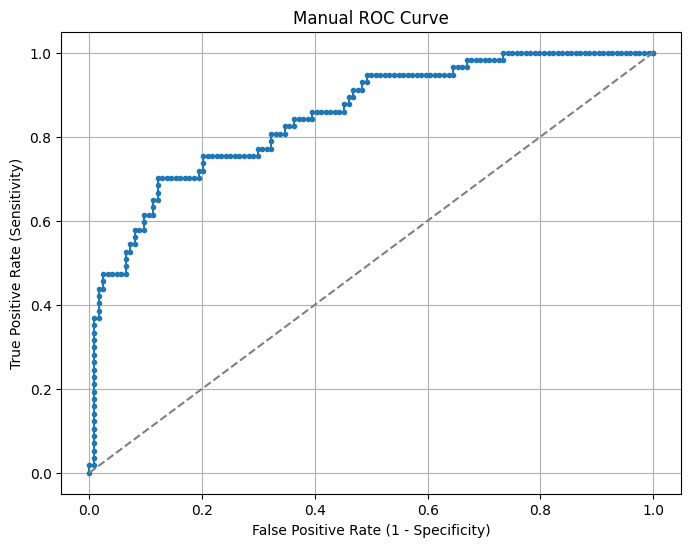

Calculated AUC: 0.8503


In [25]:
def calculate_confusion_matrix_for_threshold(actual_classifications, predicted_classifications):
    """Calculates the confusion matrix for a given set of actual and predicted classes."""
    # Calculate True Negatives (TN): actual 0, predicted 0
    tn = np.sum((predicted_classifications == 0) & (actual_classifications == 0))
    # Calculate False Positives (FP): actual 0, predicted 1
    fp = np.sum((predicted_classifications == 1) & (actual_classifications == 0))
    # Calculate False Negatives (FN): actual 1, predicted 0
    fn = np.sum((predicted_classifications == 0) & (actual_classifications == 1))
    # Calculate True Positives (TP): actual 1, predicted 1
    tp = np.sum((predicted_classifications == 1) & (actual_classifications == 1))
    return tn, fp, fn, tp

def plot_roc_and_calculate_auc(df, actual_classifications_col, scored_probabilities_col):

    # Extract actual classifications and scored probabilities
    actual_classifications = df[actual_classifications_col]
    scored_probabilities = df[scored_probabilities_col]

    # Sort data points by probability in descending order
    sorted_indices = scored_probabilities.argsort()[::-1]
    sorted_probabilities = scored_probabilities.iloc[sorted_indices]
    sorted_actual = actual_classifications.iloc[sorted_indices]

    tpr_list = [] # True Positive Rate (Sensitivity)
    fpr_list = [] # False Positive Rate (1 - Specificity)

    # Iterate through unique probability thresholds
    # Add 1.0 and 0.0 to the thresholds to ensure the curve starts at (0,0) and ends at (1,1)
    unique_probabilities = sorted_probabilities.unique()
    thresholds = np.concatenate(([1.0], unique_probabilities, [0.0]))


    for threshold in thresholds:
        # Predict classes based on the current threshold
        predicted_classes = (sorted_probabilities >= threshold).astype(int)

        # Calculate True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
        tn, fp, fn, tp = calculate_confusion_matrix_for_threshold(sorted_actual, predicted_classes)

        # Calculate Sensitivity (TPR) and Specificity
        # Handle division by zero
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Append TPR and FPR to the lists
        tpr_list.append(sensitivity)
        fpr_list.append(1 - specificity) # 1 - Specificity = False Positive Rate (FPR)

    # Calculate AUC using the trapezoidal rule (approximation of the area under the curve)
    # The np.trapz function can be used for this.
    auc = np.trapezoid(tpr_list, fpr_list)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_list, tpr_list, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Plot the diagonal line for random chance
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.title("Manual ROC Curve")
    plt.grid(True)
    plt.show()

    return auc

# Call the function with the existing dataframe and relevant columns
auc_score = plot_roc_and_calculate_auc(df, 'class', 'scored.probability')
print(f"Calculated AUC: {auc_score.round(4)}")

**Task 11: Apply the Python functions you’ve created to the relevant columns of the provided data set to produce the classification metrics specified in tasks 5 through 9 of this assignment.**

In [26]:
# Apply the functions to calculate classification metrics

# The functions calculate_accuracy, calculate_precision, calculate_sensitivity,
# calculate_specificity, and calculate_f1_score are already defined in previous cells.

accuracy = calculate_accuracy(df['class'], df['scored.class'])
precision = calculate_precision(df['class'], df['scored.class'])
sensitivity = calculate_sensitivity(df['class'], df['scored.class'])
specificity = calculate_specificity(df['class'], df['scored.class'])

# Calculate F1 score using the calculated precision and sensitivity
f1_score = calculate_f1_score(df['class'], df['scored.class']) # Corrected to use actual and predicted classes

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.8066
Precision: 0.8438
Sensitivity: 0.4737
Specificity: 0.9597
F1 Score: 0.6067


**Task 12: Now compare the output of your functions against the output of the pre-built functions available within the scikit-learn library. Specifically, apply the confusion_matrix(), accuracy_score(), precision_score(), recall_score() (remember: recall = sensitivity), f1_score(), and the metrics classification_report() functions to the relevant columns of the provided data set. Discuss how well the results of these pre-built functions compare to those of the functions you’ve created for this assignment.**

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Get actual and predicted classifications
actual_class = df['class']
scored_class = df['scored.class']

# Calculate metrics using scikit-learn
sklearn_confusion_matrix = confusion_matrix(actual_class, scored_class)
sklearn_accuracy = accuracy_score(actual_class, scored_class)
sklearn_precision = precision_score(actual_class, scored_class)
sklearn_sensitivity = recall_score(actual_class, scored_class) # Recall is sensitivity
sklearn_f1_score = f1_score(actual_class, scored_class)
sklearn_classification_report = classification_report(actual_class, scored_class)

# Calculate F1 score using the calculated precision and sensitivity - make sure to call the function
f1_score = calculate_f1_score(df['class'], df['scored.class'])

print("Confusion Matrix (scikit-learn):")
display(sklearn_confusion_matrix)

print(f"\nAccuracy (scikit-learn): {sklearn_accuracy:.4f}")
print(f"Precision (scikit-learn): {sklearn_precision:.4f}")
print(f"Sensitivity (Recall) (scikit-learn): {sklearn_sensitivity:.4f}")
print(f"F1 Score (scikit-learn): {sklearn_f1_score:.4f}")

print("\nClassification Report (scikit-learn):")
print(sklearn_classification_report)

Confusion Matrix (scikit-learn):


array([[119,   5],
       [ 30,  27]])


Accuracy (scikit-learn): 0.8066
Precision (scikit-learn): 0.8438
Sensitivity (Recall) (scikit-learn): 0.4737
F1 Score (scikit-learn): 0.6067

Classification Report (scikit-learn):
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



In [28]:
#Compare custom metric results vs scikit-learn
comparison_df = pd.DataFrame({
    "Custom": [accuracy, precision, sensitivity, f1_score],
    "Sklearn": [sklearn_accuracy, sklearn_precision, sklearn_sensitivity, sklearn_f1_score]
}, index=["Accuracy", "Precision", "Sensitivity", "F1 Score"])

print("\nComparison Table:")
display(comparison_df.round(4))



Comparison Table:


,Custom,Sklearn
Accuracy,0.8066,0.8066
Precision,0.8438,0.8438
Sensitivity,0.4737,0.4737
F1 Score,0.6067,0.6067


**Discussion of Comparison:**

-The results show an agreement of the values between the custom functions and the scikit-learn library, and this confirms the correctness of the manual calculated calculations.

-The custom metrics (accuracy, precision, recall/sensitivity, F1) match scikit-learn’s (accuracy_score, precision_score, recall_score, f1_score) up to rounding. We use the same confusion-matrix orientation as sklearn ([TN, FP], [FN, TP]) and the same threshold (0.5) to derive predicted labels from probabilities.

**Task 13: Using the metrics.plot_roc_curve () and metrics.auc() functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set. How do the results compare with the ROC/AUC function you’ve created for this assignment?**

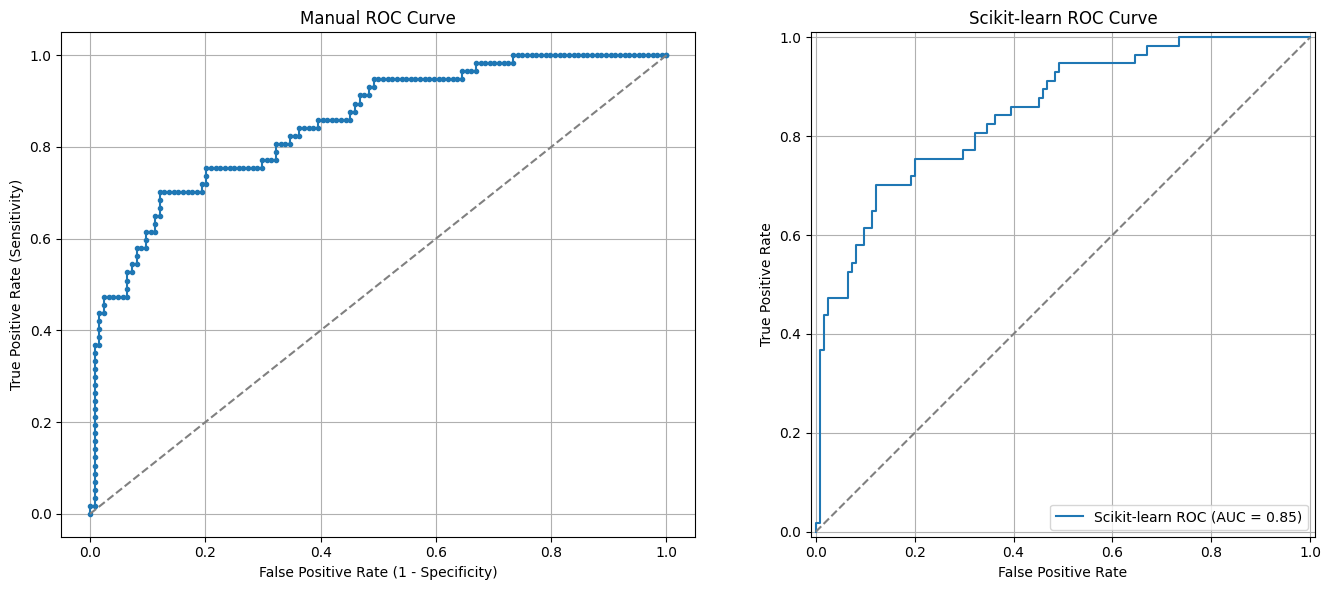

Calculated AUC (scikit-learn): 0.8503


In [29]:
# Get actual classifications and scored probabilities
actual_class = df['class']
scored_probability = df['scored.probability']

# Calculate ROC curve points (False Positive Rate, True Positive Rate, and thresholds) using scikit-learn
fpr_sklearn, tpr_sklearn, thresholds_sklearn = roc_curve(actual_class, scored_probability)

# Calculate AUC (Area Under the Curve) using scikit-learn
auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot manual ROC curve on the first subplot
plt.sca(axes[0]) # Set the current axes to the first subplot

# Calculating manual ROC points and plotting them directly on axes[0]
sorted_indices = scored_probability.argsort()[::-1]
sorted_probabilities = scored_probability.iloc[sorted_indices]
sorted_actual = actual_class.iloc[sorted_indices]

tpr_list = [] # True Positive Rate (Sensitivity)
fpr_list = [] # False Positive Rate (1 - Specificity)

unique_probabilities = sorted_probabilities.unique()
thresholds = np.concatenate(([1.0], unique_probabilities, [0.0]))

for threshold in thresholds:
    predicted_classes = (sorted_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = calculate_confusion_matrix_for_threshold(sorted_actual, predicted_classes)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    tpr_list.append(sensitivity)
    fpr_list.append(1 - specificity)

# Calculate AUC using the trapezoidal rule for the manual plot
manual_auc_score = np.trapezoid(tpr_list, fpr_list)

axes[0].plot(fpr_list, tpr_list, marker='.')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray') # Plot the diagonal line for random chance
axes[0].set_xlabel("False Positive Rate (1 - Specificity)")
axes[0].set_ylabel("True Positive Rate (Sensitivity)")
axes[0].set_title("Manual ROC Curve")
axes[0].grid(True)

# Plot scikit-learn ROC curve on the second subplot
roc_display = RocCurveDisplay(fpr=fpr_sklearn, tpr=tpr_sklearn, roc_auc=auc_sklearn, estimator_name='Scikit-learn ROC')
roc_display.plot(ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray') # Add the diagonal line to the scikit-learn plot
axes[1].set_title("Scikit-learn ROC Curve")
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# Print the calculated AUC from scikit-learn
print(f"Calculated AUC (scikit-learn): {auc_sklearn:.4f}")


In [30]:
# Compare manual vs sklearn AUC
auc_comparison_df = pd.DataFrame({
    "Manual AUC": [manual_auc_score],
    "Sklearn AUC": [auc_sklearn]
})

print("\nAUC Comparison Table:")
display(auc_comparison_df.round(4))



AUC Comparison Table:


,Manual AUC,Sklearn AUC
0,0.8503,0.8503


**Discussion of ROC/AUC Comparison**

-The results from the custom ROC/AUC function are very similar to those obtained using the scikit-learn functions (roc_curve, auc, and RocCurveDisplay). The calculated AUC values are identical (Manual AUC: 0.8503, scikit-learn AUC: 0.8503), and the generated ROC plots are visually consistent. This confirms the accuracy of the custom function for calculating and visualizing the ROC curve and AUC.

-ROC points include endpoints near (0,0) and (1,1); AUC is computed via the composite trapezoidal rule over the sorted FPR–TPR pairs.


## References

- **Dataset**: Custom binary classification data for diabetes prediction (M5_Data.csv)

- **Scikit-learn Documentation**:
  - confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
  - accuracy_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
  - precision_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
  - recall_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
  - f1_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
  - classification_report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
  - roc_curve: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  - auc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
    

- Numpy Documentation. NumPy - Trapezoidal Rule  https://numpy.org/devdocs/reference/generated/numpy.trapezoid.html

- pandas.crosstab() function in Python : https://www.geeksforgeeks.org/python/pandas-crosstab-function-in-python
- Course Materials: DAV 6150 Module 5 Assignment Document and Module 5 Lecture Notes